In [0]:
'''
AuthorClassifier
tran ( train csv)
test(csv)
'''
root_folder = '/content/drive/My Drive/Colab Notebooks/SMAI/2019201089-Assignment 2/'

train_data_path  = root_folder + 'Datasets/Question-4/weather.csv'
data_description = root_folder + 'Datasets/Question-4/description.txt'

In [90]:
train_data_path

'/content/drive/My Drive/Colab Notebooks/SMAI/2019201089-Assignment 2/Datasets/Question-4/weather.csv'

In [0]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib
from sklearn.feature_extraction.text import TfidfVectorizer

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

os.chdir(root_folder)

In [92]:
!ls -l 

total 11557
-rw------- 1 root root   40356 Mar  2 17:58 'Copy of q4_ linear_regression.ipynb'
drwx------ 8 root root    4096 Feb 25 09:59  Datasets
-rw------- 1 root root   47611 Mar  3 13:55  q1_cfar10.ipynb
-rw------- 1 root root  138859 Mar  2 16:30  q3_linear_regression.ipynb
-rw------- 1 root root  121536 Mar  3 19:35 'q4_ linear_regression.ipynb'
-rw------- 1 root root   53674 Feb 25 09:59  SMAI_A2.pdf
-rw------- 1 root root    5375 Feb 28 09:48  svm_q5.ipynb
-rw------- 1 root root     704 Feb 27 18:59  test56.py
-rw------- 1 root root    1402 Feb 25 09:59  test.py
-rw------- 1 root root 9230076 Mar  3 18:14  train.csv
-rw------- 1 root root 2188480 Mar  3 18:14  val.csv


####Data Description

In [93]:
with open(data_description,'r') as describe:
    print(describe.read())

1. Title: historical weather database

2. Number of Instances: 77286

3. Number of Attributes: 10 + output variable

4. Attribute Information:
	
	1. Formatted Date
	2. Summary
	3. Precip Type // it has 3 values rain, snow and null, there is no missing value it's null. 
	4. Temperature (C)
	5. Apparent Temperature (C) [Output Class]
	6. Humidity
	7. Wind Speed (km/h)
	8. Wind Bearing (degrees)
	9. Visibility (km)
	10. Pressure (millibars)
	11. Daily Summary

5. Missing Attribute Values: None



In [0]:
data_frame = pd.read_csv(train_data_path)

In [95]:
data_frame.describe()

Temperature (C)  ...  Pressure (millibars)
count     77285.000000  ...          77285.000000
mean         11.932073  ...           1003.218889
std           9.568044  ...            117.080764
min         -21.822222  ...              0.000000
25%           4.561111  ...           1011.910000
50%          11.994444  ...           1016.470000
75%          18.850000  ...           1021.080000
max          39.905556  ...           1046.380000

[8 rows x 7 columns]

In [96]:
data_frame.head(20)

Formatted Date  ...                      Daily Summary
0   2006-04-01 00:00:00.000 +0200  ...  Partly cloudy throughout the day.
1   2006-04-01 01:00:00.000 +0200  ...  Partly cloudy throughout the day.
2   2006-04-01 02:00:00.000 +0200  ...  Partly cloudy throughout the day.
3   2006-04-01 03:00:00.000 +0200  ...  Partly cloudy throughout the day.
4   2006-04-01 04:00:00.000 +0200  ...  Partly cloudy throughout the day.
5   2006-04-01 05:00:00.000 +0200  ...  Partly cloudy throughout the day.
6   2006-04-01 06:00:00.000 +0200  ...  Partly cloudy throughout the day.
7   2006-04-01 07:00:00.000 +0200  ...  Partly cloudy throughout the day.
8   2006-04-01 08:00:00.000 +0200  ...  Partly cloudy throughout the day.
9   2006-04-01 09:00:00.000 +0200  ...  Partly cloudy throughout the day.
10  2006-04-01 11:00:00.000 +0200  ...  Partly cloudy throughout the day.
11  2006-04-01 12:00:00.000 +0200  ...  Partly cloudy throughout the day.
12  2006-04-01 13:00:00.000 +0200  ...  Partly cloudy throughout the day.
13  2006-04-01 15:00:00.000 +0200  ...  Partly cloudy throughout the day.
14  2006-04-01 16:00:00.000 +0200  ...  Partly cloudy throughout the day.
15  2006-04-01 17:00:00.000 +0200  ...  Partly cloudy throughout the day.
16  2006-04-01 18:00:00.000 +0200  ...  Partly cloudy throughout the day.
17  2006-04-01 19:00:00.000 +0200  ...  Partly cloudy throughout the day.
18  2006-04-01 20:00:00.000 +0200  ...  Partly cloudy throughout the day.
19  2006-04-01 21:00:00.000 +0200  ...  Partly cloudy throughout the day.

[20 rows x 11 columns]

In [0]:
def preprocess(data_frame):
    wind = []
    rain = []
    overcast = []
    foggy = []
    for i in data_frame['Summary']:
        st = i.lower()
        
        if st.find('wind') != -1: wind.append(1)
        elif st.find('breez') != -1: wind.append(0.5)
        else: wind.append(0)

        if st.find('clear') != -1: foggy.append(-1)
        elif st.find('fog') != -1: foggy.append(1)
        else: foggy.append(0)

        if st.find('overcast') != -1: overcast.append(1)
        elif st.find('cloud') != -1: overcast.append(0.5)
        else: overcast.append(0)

        if st.find('rain') != -1: rain.append(1)
        elif st.find('drizzle') != -1: rain.append(0.5)
        else: rain.append(0)
        
    data_frame['_rain'] =np.array(rain)
    data_frame['_overcast']=np.array(overcast)
    data_frame['_foggy'] = np.array(foggy)
    data_frame['_wind'] = np.array(wind)
    
    wind = []
    rain = []
    overcast = []
    foggy = []
    for i in data_frame['Daily Summary']:
        st = i.lower()
        
        if st.find('wind') != -1: wind.append(1)
        elif st.find('breez') != -1: wind.append(0.5)
        else: wind.append(0)

        if st.find('clear') != -1: foggy.append(-1)
        elif st.find('fog') != -1: foggy.append(1)
        else: foggy.append(0)

        if st.find('overcast') != -1: overcast.append(1)
        elif st.find('cloud') != -1: overcast.append(0.5)
        else: overcast.append(0)

        if st.find('rain') != -1: rain.append(1)
        elif st.find('drizzle') != -1: rain.append(0.5)
        else: rain.append(0)


        
    data_frame['rain'] =np.array(rain)
    data_frame['overcast']=np.array(overcast)
    data_frame['foggy'] = np.array(foggy)
    data_frame['wind'] = np.array(wind)

    data_frame = data_frame.drop(['Daily Summary', 'Summary', '''Formatted Date'''], axis=1)

    numerical_features = data_frame.dtypes[data_frame.dtypes != 'object'].index
    categorical_features = data_frame.dtypes[data_frame.dtypes == 'object'].index
    _categorical_missing_values = data_frame[categorical_features].isnull().sum().sort_values(ascending=False)
    
    for col in _categorical_missing_values.index:
        data_frame[col].fillna('None', inplace=True)
    
    data_frame.fillna(data_frame.mean(), inplace=True)
    '''Precip Type'''
    data_frame = pd.get_dummies(data_frame, prefix=['Precip Type'], drop_first=True)
    return data_frame


Cost is defined as 
$MSE = 1/2N(\sum(y_i - W^TX)^2$
vectorize 


$ gradrient =  -X(TARGETS - PREDICTIONS)$


In [0]:
class AuthorClassifier():

    def __init__(self, alpha=0.01, cost_function_type='mse', epochs=500, random_weights=False):
        '''set defaults '''

        '''
        data frame has train data
        weights are for line/hyper plane
        alpha for learning rate
        target for y_actual
        bias
        features_count for number of features
        N is total number of inputs
        '''

        self.data_frame = self.weights = None
        self.features = None
        self.target = None
        self.N = 0

        self.cost_function_type = 'mse'
        self.alpha = alpha
        self.epochs = epochs
        self.random_weights = random_weights
        self.cost_history = []
        # self.predictions =None

        self.initial_weights = None

    def feature_normalize(self, features):
        '''
        min max feature scaling
        goal to bring value to the range -1 to 1
        deal with bias term min == max for it deal with it
        '''
        for feature in features.T:
            feature_mean , feature_range = np.mean(feature), np.amax(feature) - np.amin(feature)

            feature -= feature_mean
            feature /= feature_range
        return features
    

    def cost_function_J(self):
        '''sum of euclidian distance between predicted to target values'''

        if self.cost_function_type == 'mse':
            # print('''cost_Finction_j\n\n\n''')
            #self._predict(self.features)
            # print(self._predict(self.features))
            # input()
            
            return np.sum(np.power(np.array(self._predict(self.features) - self.target), 2))/(1.0 * 2 * self.N)
        else:
            pass

    def gradient_descent(self):
        prediction_error = self.target - self._predict(self.features)
        gradients = np.dot(-self.features.T, prediction_error) / self.N

        # print(gradients, gradients.shape, self.weights.shape)
        # print(gradients.shape)
        self.weights -= self.alpha * gradients

        return


    def initialize_weights(self):
        '''
        initialize weights
        '''
        if self.random_weights:
            self.weights = np.random.ranf(size =(self.features_count, 1))
        else:
            self.weights = np.zeros(shape=(self.features_count, 1)) # sub 1 for target does not need weight
        print('Initial Weigths ', ' '.join(['{0:.5f}\t'.format(i[0]) for i in self.weights]))
        import copy
        self.initial_weights = copy.deepcopy(self.weights)

    def add_bias_term(self):
        bias = np.ones(shape=(self.features.T[0].shape[0], 1))
        self.features = np.append( self.features, bias, axis=1)
    
    def _predict(self, features):
        return np.dot(features, self.weights)

    def model_setup(self, data_frame):
        self.features = np.array(data_frame)
        '''
        min-max scaling
        '''
        self.features = self.feature_normalize(self.features)
        
        '''
        we are taking bias inside the weight vector so we add bias to features count
        '''
        self.add_bias_term()

        self.N, self.features_count = self.features.shape[0], self.features.shape[1]
        self.initialize_weights()



    def train(self, train_data_path='/content/drive/My Drive/Colab Notebooks/SMAI/2019201089-Assignment 2/Datasets/Question-4/weather.csv'):
        data_frame = None
        try:
            data_frame = pd.read_csv(train_data_path)
            data_frame = preprocess(data_frame)
            self.target = data_frame['Apparent Temperature (C)'].values.reshape(-1,1)
            data_frame = data_frame.drop(['Apparent Temperature (C)'], axis=1)
        except:
            print('No such file found')
            exit(-1)
        
        '''
        setup phase
        '''
        self.model_setup(data_frame)
        
        for i in range(1, self.epochs + 1):
            self.gradient_descent()
            self.cost_history.append(self.cost_function_J())
            if i%(self.epochs//10)==0:
                print('{0:5d}\t'.format(i), ' epoch cost ','{0:.5f}\t'.format(self.cost_history[-1]), 'weights ', ' '.join(("{0:.5f}\t".format(i[0]) for i in self.weights)))
    
        return self.cost_history, self.weights

    def predict(self, test_data_path = 'Datasets/Question-3/weather.csv'):
        data_frame = pd.read_csv(test_data_path)
        self.test_x = preprocess(data_frame)
        self.test_x = self.test_x.values
        self.test_x = self.feature_normalize(self.test_x)

        bias = np.ones(shape=(self.test_x.T[0].shape[0], 1))
        self.test_x = np.append(self.test_x, bias, axis=1)
        
        return self._predict(self.test_x)

###Sample Validation set
To test the r2_score and Mean square

In [0]:
data_frame = pd.read_csv(train_data_path)
from sklearn.utils import shuffle
data_frame = shuffle(data_frame)
val=int(-data_frame.shape[0]*0.21)
output=data_frame.iloc[val:]['Apparent Temperature (C)']
val_csv = data_frame.iloc[val:].drop(['Apparent Temperature (C)'], axis=1)
val_csv.to_csv('val.csv', index=False)
data_frame.iloc[:data_frame.shape[0]+val].to_csv('train.csv', index=False)


In [100]:
# from q5 import AuthorClassifier as ac
auth_classifier = AuthorClassifier(epochs=20000, random_weights=True)
costs_history = auth_classifier.train('train.csv') # Path to the train.csv will be provided
predictions = auth_classifier.predict('val.csv') # Path to the test.csv will be provided

'''WE WILL CHECK THE PREDICTIONS WITH THE GROUND TRUTH LABELS'''

Initial Weigths  0.40874	 0.41671	 0.67440	 0.97689	 0.84471	 0.92274	 0.88741	 0.16788	 0.58821	 0.54300	 0.50643	 0.92586	 0.96859	 0.61815	 0.67641	 0.95650	 0.60721	
 2000	  epoch cost  14.54921	 weights  17.99074	 -10.38328	 -2.20933	 0.26117	 3.78320	 0.69752	 0.85048	 -2.11671	 0.15204	 -0.31536	 0.53820	 2.10945	 -1.95456	 -2.11706	 6.53239	 -5.37350	 10.87408	
 4000	  epoch cost  8.74757	 weights  27.68126	 -12.90966	 -4.36969	 0.27796	 2.56878	 0.53919	 0.81973	 -1.91206	 1.14962	 -0.68433	 0.57708	 1.25679	 -1.58583	 -3.39256	 5.03069	 -4.33441	 10.87408	
 6000	  epoch cost  5.99346	 weights  34.68766	 -12.96939	 -5.82533	 0.39583	 1.71342	 0.37805	 0.79728	 -1.38654	 1.48357	 -0.75537	 0.61013	 0.84220	 -1.29398	 -3.83678	 3.97531	 -3.63631	 10.87408	
 8000	  epoch cost  4.37959	 weights  40.06261	 -12.04069	 -6.76896	 0.46488	 1.16165	 0.23379	 0.77996	 -0.98386	 1.48896	 -0.65573	 0.63739	 0.62870	 -1.07845	 -3.82710	 3.20574	 -3.15154	 10.87408	
10000	  epoch cost  3.317

'WE WILL CHECK THE PREDICTIONS WITH THE GROUND TRUTH LABELS'

In [0]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [102]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('r2 score                      \t\t', '{0:.5f}'.format(r2_score(output, predictions)))
print('mean square error             \t\t', '{0:.5f}'.format(mean_squared_error(output, predictions)))
print('mean absolute error           \t\t', '{0:.5f}'.format(mean_absolute_error(output, predictions)))
print('mean absolute percentage error\t\t', '{0:.5f}'.format(mean_absolute_percentage_error(output, predictions)))

r2 score                      		 0.97979
mean square error             		 2.32057
mean absolute error           		 1.21088
mean absolute percentage error		 82.29658


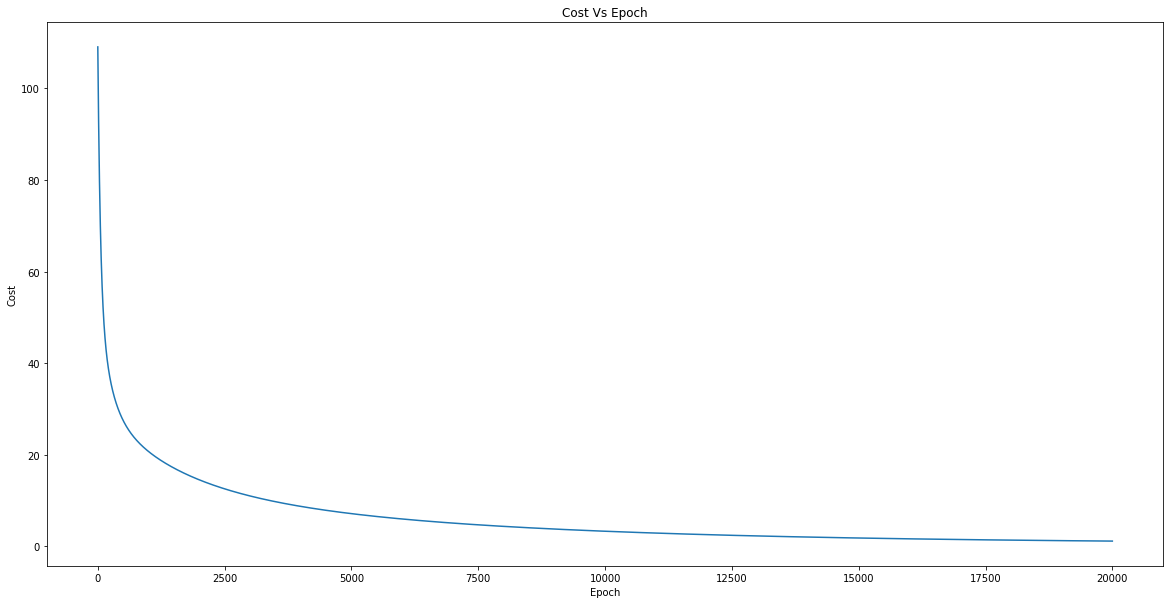

In [109]:
plt.plot(list(range(20000)), costs_history[0])
plt.title('Cost Vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

## Random Initail Values

In [104]:
model3 = AuthorClassifier(epochs=20000, random_weights=True)
cost_history_wt1 = model3.train() # Path to the train.csv will be provided
intital_wt1 = 'wt1 '+str(' '.join('{0:.2f}'.format(i[0]) for i in model3.initial_weights[:]))

Initial Weigths  0.49780	 0.19666	 0.37075	 0.55395	 0.60550	 0.90131	 0.25548	 0.77805	 0.48439	 0.50505	 0.66917	 0.19939	 0.13140	 0.96300	 0.18682	 0.18616	 0.47134	
 2000	  epoch cost  14.74600	 weights  17.86250	 -10.53392	 -2.19393	 0.17289	 3.61687	 0.72586	 0.22018	 -1.94757	 0.05392	 -0.36658	 0.67804	 1.43545	 -2.67806	 -1.84116	 5.96483	 -5.97874	 10.85129	
 4000	  epoch cost  8.99206	 weights  27.53603	 -13.03109	 -4.24954	 0.23790	 2.47847	 0.61301	 0.19068	 -1.86438	 1.08649	 -0.78368	 0.69635	 0.68853	 -2.22070	 -3.24162	 4.51772	 -4.90763	 10.85129	
 6000	  epoch cost  6.20762	 weights  34.58209	 -13.06961	 -5.74272	 0.36080	 1.66649	 0.48415	 0.17006	 -1.39096	 1.45613	 -0.91107	 0.71181	 0.36535	 -1.84175	 -3.80448	 3.50787	 -4.17799	 10.85129	
 8000	  epoch cost  4.54971	 weights  40.02163	 -12.12666	 -6.79919	 0.43267	 1.14109	 0.35939	 0.15535	 -1.01399	 1.48640	 -0.86228	 0.72440	 0.22872	 -1.54777	 -3.88768	 2.77515	 -3.66083	 10.85129	
10000	  epoch cost  3.448

In [105]:
model3 = AuthorClassifier(epochs=20000, random_weights=True)
cost_history_wt2 = model3.train() # Path to the train.csv will be provided
intital_wt2 = 'wt2 ' + str(' '.join('{0:.2f}'.format(i[0]) for i in model3.initial_weights[:]))

Initial Weigths  0.04910	 0.65304	 0.16751	 0.37291	 0.73077	 0.74808	 0.02505	 0.06540	 0.97573	 0.46490	 0.76911	 0.18859	 0.65378	 0.40917	 0.14642	 0.19738	 0.96407	
 2000	  epoch cost  14.90257	 weights  17.58995	 -10.38712	 -2.25747	 0.16035	 3.88396	 0.58598	 -0.00977	 -2.12719	 0.30595	 -0.35109	 0.77979	 1.67749	 -2.44408	 -2.22628	 5.99383	 -6.04565	 10.85129	
 4000	  epoch cost  9.07530	 weights  27.32436	 -12.99004	 -4.26593	 0.24307	 2.65920	 0.48371	 -0.03585	 -1.95015	 1.24333	 -0.74275	 0.80243	 0.89404	 -2.02632	 -3.53142	 4.51889	 -4.95307	 10.85129	
 6000	  epoch cost  6.26154	 weights  34.41145	 -13.07888	 -5.73759	 0.36712	 1.78440	 0.36871	 -0.05301	 -1.44458	 1.55330	 -0.85663	 0.82141	 0.53128	 -1.67215	 -4.02850	 3.50111	 -4.21862	 10.85129	
 8000	  epoch cost  4.58809	 weights  39.88022	 -12.15884	 -6.78463	 0.43813	 1.21909	 0.25913	 -0.06453	 -1.05101	 1.54609	 -0.80104	 0.83667	 0.36478	 -1.40009	 -4.06406	 2.76476	 -3.69899	 10.85129	
10000	  epoch cost  3

In [106]:
model3 = AuthorClassifier(epochs=20000, random_weights=True)
cost_history_wt3 = model3.train() # Path to the train.csv will be provided
intital_wt3 = 'wt3 ' + str(' '.join('{0:.2f}'.format(i[0]) for i in model3.initial_weights[:]))

Initial Weigths  0.10007	 0.48793	 0.36990	 0.93956	 0.17821	 0.10663	 0.00895	 0.58975	 0.17424	 0.31109	 0.43902	 0.00908	 0.89612	 0.94189	 0.90284	 0.39058	 0.47900	
 2000	  epoch cost  14.92222	 weights  17.62336	 -10.51905	 -2.16052	 0.24824	 3.55747	 0.12345	 -0.01887	 -1.93508	 -0.19220	 -0.54371	 0.46862	 1.59818	 -2.29900	 -1.85377	 6.45846	 -5.60949	 10.85129	
 4000	  epoch cost  9.07013	 weights  27.36506	 -13.08323	 -4.21598	 0.25444	 2.47119	 0.14685	 -0.03866	 -1.85315	 0.95046	 -0.94809	 0.50929	 0.87081	 -1.93380	 -3.25500	 4.94549	 -4.52349	 10.85129	
 6000	  epoch cost  6.25492	 weights  34.45111	 -13.13844	 -5.71242	 0.36663	 1.67253	 0.12020	 -0.05007	 -1.39047	 1.38486	 -1.06351	 0.54556	 0.52995	 -1.60636	 -3.81693	 3.90227	 -3.80769	 10.85129	
 8000	  epoch cost  4.58280	 weights  39.91689	 -12.19507	 -6.77199	 0.43634	 1.15172	 0.07369	 -0.05636	 -1.01967	 1.44923	 -1.00338	 0.57715	 0.37150	 -1.35196	 -3.89806	 3.14350	 -3.30852	 10.85129	
10000	  epoch cost  

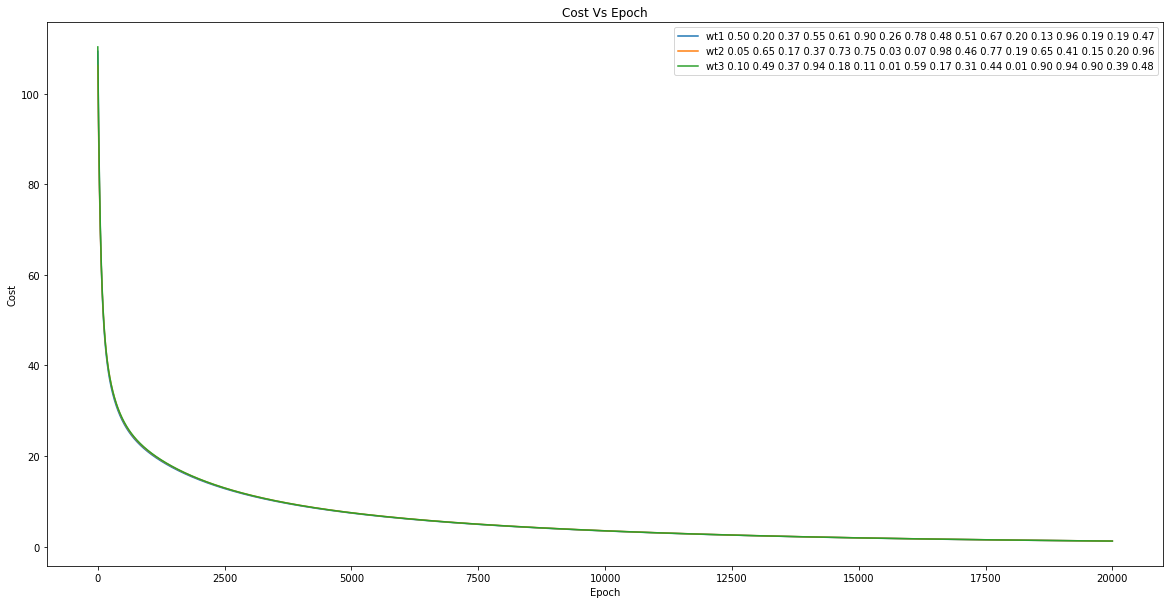

In [112]:
plt.plot(list(range(20000)), cost_history_wt1[0])
plt.plot(list(range(20000)), cost_history_wt2[0])
plt.plot(list(range(20000)), cost_history_wt3[0])

plt.title('Cost Vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend((intital_wt1, intital_wt2, intital_wt3),
           loc='upper right')
plt.show()